In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, LeakyReLU
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

# Plant

In [2]:
specific_train = 'tomato'

# Definitions

In [3]:
image_size = tuple((64, 64))
height = image_size[0]
width = image_size[1]
depth = 3

# Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../dataset/train_images/' + specific_train,
                                                 target_size = image_size,
                                                 batch_size = 32)

Found 8667 images belonging to 8 classes.


In [5]:
num_classes = len(training_set.class_indices)
train_labels = training_set.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)
class_indices = training_set.class_indices
class_indices

{'bacterial': 0,
 'early_blight': 1,
 'healhtly': 2,
 'late_blight': 3,
 'mold': 4,
 'mosaic_virus': 5,
 'septoria': 6,
 'yellow_virus': 7}

### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../dataset/test_images/' + specific_train,
                                            target_size = image_size,
                                            batch_size = 32)

Found 864 images belonging to 8 classes.


# Part 2 - Building the CNN


In [7]:
cnn = Sequential()

Step 1 - Convolution


In [8]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(height, width, depth)))
cnn.add(BatchNormalization(axis=-1))

In [9]:
cnn.add(MaxPool2D(pool_size=(3, 3)))
cnn.add(Dropout(0.25))

Adding a second convolutional layer

In [10]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation='relu'))
cnn.add(BatchNormalization(axis=-1))
cnn.add(MaxPool2D(pool_size=(3, 3)))
cnn.add(Dropout(0.2))

## Flattening

In [11]:
cnn.add(Flatten())

Step 4 - Full Connection

In [12]:

cnn.add(Dense(units=256, activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.15))

Step 5 - Output Layer

In [13]:
cnn.add(Dense(units=num_classes, activation='softmax'))

# Part 3 - Training the CNN

Compiling the CNN

In [14]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the CNN on the Training set and evaluating it on the Test set

In [15]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
271/271 [==============================] - 114s 331ms/step - loss: 1.2643 - accuracy: 0.5996 - val_loss: 33.4997 - val_accuracy: 0.1620
Epoch 2/25
271/271 [==============================] - 88s 325ms/step - loss: 0.7055 - accuracy: 0.7694 - val_loss: 4.7761 - val_accuracy: 0.4028
Epoch 3/25
271/271 [==============================] - 89s 328ms/step - loss: 0.5666 - accuracy: 0.8169 - val_loss: 0.6790 - val_accuracy: 0.7917
Epoch 4/25
271/271 [==============================] - 89s 329ms/step - loss: 0.4616 - accuracy: 0.8468 - val_loss: 2.0616 - val_accuracy: 0.4861
Epoch 5/25
271/271 [==============================] - 90s 334ms/step - loss: 0.4185 - accuracy: 0.8575 - val_loss: 0.7449 - val_accuracy: 0.7546
Epoch 6/25
271/271 [==============================] - 88s 326ms/step - loss: 0.3902 - accuracy: 0.8691 - val_loss: 0.9878 - val_accuracy: 0.6806
Epoch 7/25
271/271 [==============================] - 89s 328ms/step - loss: 0.3768 - accuracy: 0.8708 - val_loss: 0.6827 - val_

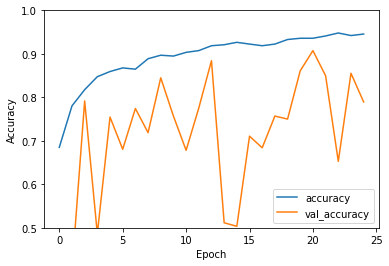

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Saving the model

In [17]:
cnn.save(f'../model/{specific_train}')

INFO:tensorflow:Assets written to: ../model/tomato\assets
